<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import mpmath

Let $\eta(x,t) = \sin(t) sech(x).$ Then, 
$$
\eta \int^x_0 \eta_t(x',t) ~ dx' = \sin(2t) ~\mathrm{sech}(x) \arctan(\tanh \left(\frac{x}{2} \right) ),
$$
so that 
$$
\partial_t\left( \sin(2t) ~\mathrm{ sech}(x) \arctan(\tanh \left(\frac{x}{2} \right) ) \right) = 2\cos(2t) sech(x) \arctan(\tanh \left(\frac{x}{2} \right) ).
$$
First, we compute $\mathcal{F}^k_c\{2\cos(2t)~\mathrm{ sech}(x) \arctan(\tanh \left(\frac{x}{2} \right) \}$ at various times $t\in[0, 2\pi].$

In [3]:
from scipy.fftpack import dst, idst, dct, idct

In [88]:
def testQ(xx,tt):
    yy = np.copy(xx)
    for k in range(0,len(xx)):
        yy[k] = np.cos(2*tt)*float(mpmath.sech(xx[k]))*np.arctan(np.tanh(xx[k]/2))
        
    return yy

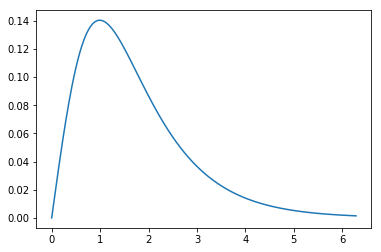

In [200]:
N = 300;
x = np.linspace(0,2*np.pi,N);
t = np.pi/6
y = testQ(x,t)
plt.plot(x, y)

Take the discrete Cosine transform:

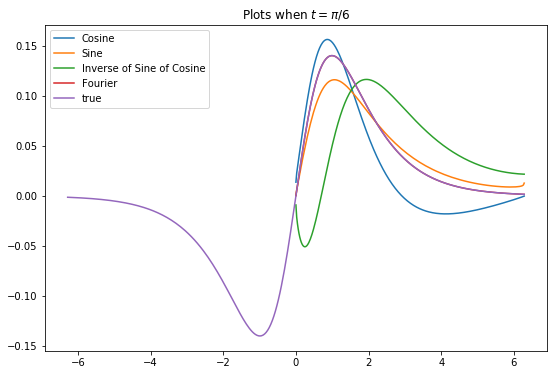

In [211]:
yDCT = dct(y, type=2, norm='ortho')
yIDCT = idct(yDCT, type=3, norm='ortho')
yDST = dst(y, type=2, norm='ortho')
yIDST = idst(yDST, type=3, norm='ortho')
yNEW = idst(yDCT, type=3, norm = 'ortho')
yFFT = np.fft.fft(y)
yIFFT = np.fft.ifft(yFFT)
plt.figure(figsize=(9,6))
plt.plot(x, yIDCT)
plt.plot(x, yIDST)
plt.plot(x, yNEW)
plt.plot(x, yIFFT)
plt.plot(newx, newy)
plt.title("Plots when $t = \pi/6$")
plt.legend(['Cosine', 'Sine', 'Inverse of Sine of Cosine','Fourier','true'])

In [208]:
newx =np.linspace(-2*np.pi,2*np.pi,N);
newy = testQ(newx, t)

Take a simpler function $\eta = \sin(x)$

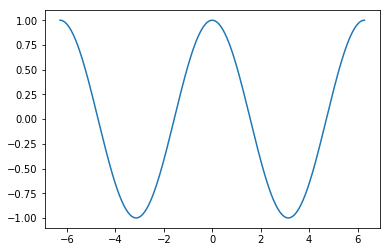

In [160]:
N = 300;
x = np.linspace(-2*np.pi,2*np.pi,N);
t = np.pi/4
y = np.cos(x)
plt.plot(x, y)

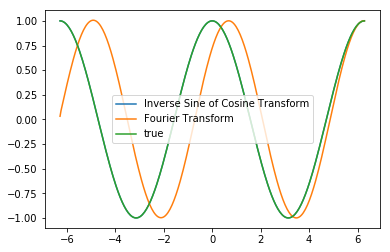

In [165]:
yDCT = dct(y, type=2, norm='ortho')
yIDCT = idst(yDCT, type=3, norm='ortho')
yFFT = np.fft.fft(y)
yIFFT = np.fft.ifft(yFFT)
plt.plot(x, yIFFT)
plt.plot(x, yIDCT)
plt.plot(x, y)
plt.legend(['Inverse Sine of Cosine Transform', 'Fourier Transform','true'])